In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [22]:
data = pd.read_csv('ga.csv')

In [23]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [24]:
data.iloc[0]['device']

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Linux", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

- key값 : value값 (json)

-JSON(제이슨[1], JavaScript Object Notation)은 속성-값 쌍( attribute–value pairs and array data types (or any other serializable value)) 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷이다.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channelGrouping       11515 non-null  object 
 1   date                  11515 non-null  int64  
 2   device                11515 non-null  object 
 3   fullVisitorId         11515 non-null  float64
 4   geoNetwork            11515 non-null  object 
 5   sessionId             11515 non-null  object 
 6   socialEngagementType  11515 non-null  object 
 7   totals                11515 non-null  object 
 8   trafficSource         11515 non-null  object 
 9   visitId               11515 non-null  int64  
 10  visitNumber           11515 non-null  int64  
 11  visitStartTime        11515 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


In [26]:
sample = data.iloc[0]['device']

In [27]:
sample

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Linux", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [28]:
json.loads(sample)

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [29]:
data['device'].apply(lambda x: json.loads(x))

0        {'browser': 'Chrome', 'browserVersion': 'not a...
1        {'browser': 'Chrome', 'browserVersion': 'not a...
2        {'browser': 'Chrome', 'browserVersion': 'not a...
3        {'browser': 'Chrome', 'browserVersion': 'not a...
4        {'browser': 'Chrome', 'browserVersion': 'not a...
                               ...                        
11510    {'browser': 'Chrome', 'browserVersion': 'not a...
11511    {'browser': 'Chrome', 'browserVersion': 'not a...
11512    {'browser': 'Chrome', 'browserVersion': 'not a...
11513    {'browser': 'Firefox', 'browserVersion': 'not ...
11514    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 11515, dtype: object

In [30]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [31]:
json_columns = ['device','geoNetwork','totals','trafficSource']

In [34]:
data = pd.read_csv('ga.csv',converters = {column: json.loads for column in json_columns})

In [35]:
{i: json.loads for i in json_columns}

{'device': <function json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)>,
 'geoNetwork': <function json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)>,
 'totals': <function json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)>,
 'trafficSource': <function json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)>}

In [36]:
data.iloc[0]['device']

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [40]:
#json 컬럼 변경
device = json_normalize(data['device'])
geoNetwork = json_normalize(data['geoNetwork'])
totals = json_normalize(data['totals'])
trafficSource = json_normalize(data['trafficSource'])

<ipython-input-40-3c811dd2aba8>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  device = json_normalize(data['device'])
<ipython-input-40-3c811dd2aba8>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  geoNetwork = json_normalize(data['geoNetwork'])
<ipython-input-40-3c811dd2aba8>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  totals = json_normalize(data['totals'])
<ipython-input-40-3c811dd2aba8>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  trafficSource = json_normalize(data['trafficSource'])


In [46]:
device.columns = [f"{'device'}.{i}" for i in device.columns]

In [44]:
f"{'hi'}.{'bye'}"  # 참고 하기

'hi_bye'

In [45]:
[f"{'device'}.{i}" for i in device.columns]

['device.browser',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystem',
 'device.operatingSystemVersion',
 'device.isMobile',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'device.deviceCategory']

In [47]:
device.head()

,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [48]:
#첫번째 방법
device.columns = [f"{'device'}.{i}" for i in device.columns]

In [49]:
geoNetwork.columns = [f"{'geoNetwork'}.{i}" for i in geoNetwork.columns]
totals.columns = [f"{'totals'}.{i}" for i in totals.columns]
trafficSource.columns = [f"{'trafficSource'}.{i}" for i in trafficSource.columns]

In [51]:
pd.concat([data, device, geoNetwork, totals, trafficSource], axis=1).drop(json_columns,axis =1) # 컬럼 합치기 

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.device.browser,device.device.browserVersion,...,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,6.849600e+18,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11511,Referral,20170104,2.119870e+17,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11512,Referral,20170104,9.981560e+18,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11513,Direct,20170104,9.631260e+17,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#두번째 방법
for i in json_columns:
    json_df = json_normalize(data[i])
    json_df.columns = [f"{i}.{j}" for j in json_df.columns]
    data = pd.concat([data.drop(i, axis=1), json_df], axis=1)

<ipython-input-53-a8c1a5e00fa2>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_df = json_normalize(data[i])


In [55]:
pd.set_option('display.max_columns', 100) #data 컬럼 다 나오게 하기

In [56]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [58]:
totals = ['totals.visits','totals.hits','totals.pageviews','totals.transactionRevenue','totals.newVisits']

In [59]:
for i in totals:
    data[i] = pd.to_numeric(data[i]) #pd.to_numeric() 함수를 이용한 문자열 칼럼의 숫자형 변환
    

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [61]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits
count,1.151500e+04,1.151500e+04,1.151500e+04,11515.000000,1.151500e+04,11515.0,11515.000000,11515.000000,1.151500e+04,4465.0
mean,2.016622e+07,4.503303e+18,1.485876e+09,4.083196,1.485876e+09,1.0,36.274251,28.330439,1.337448e+08,1.0
std,4.687452e+03,3.062080e+18,9.308961e+06,12.508556,9.308963e+06,0.0,30.269294,21.727555,4.482852e+08,0.0
min,2.016080e+07,2.131310e+14,1.470046e+09,1.000000,1.470046e+09,1.0,2.000000,2.000000,1.000000e+04,1.0
25%,2.016110e+07,1.639590e+18,1.478054e+09,1.000000,1.478054e+09,1.0,19.000000,16.000000,2.493000e+07,1.0
50%,2.017013e+07,4.377180e+18,1.485554e+09,2.000000,1.485554e+09,1.0,28.000000,23.000000,4.945000e+07,1.0
75%,2.017050e+07,7.184570e+18,1.493948e+09,4.000000,1.493948e+09,1.0,44.000000,34.000000,1.076550e+08,1.0
max,2.017080e+07,9.999000e+18,1.501652e+09,315.000000,1.501652e+09,1.0,500.000000,469.000000,2.312950e+10,1.0


C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Density'>

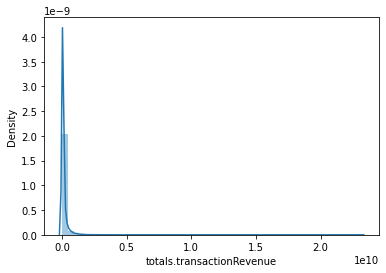

In [63]:
sns.distplot(data['totals.transactionRevenue'])

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totals.transactionRevenue', ylabel='Density'>

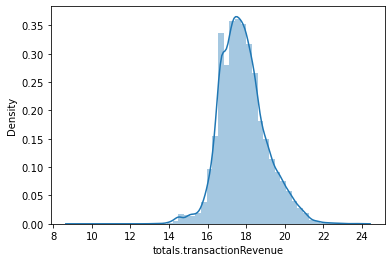

In [64]:
#log를 취한 형태
sns.distplot(np.log(data['totals.transactionRevenue']))

In [65]:
data['totals.transactionRevenue'] = np.log(data['totals.transactionRevenue'])

In [66]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

In [67]:
drop_list = ['fullVisitorId','sessionId','visitId','visitStartTime'] #컬럼명 삭제

In [68]:
data.drop(drop_list, axis=1, inplace=True)

In [69]:
data.head()

,channelGrouping,date,socialEngagementType,visitNumber,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo da

# Missing Value 확인 및 처리

In [81]:
na_list = data.isna().mean()[data.isna().mean()  >0.9].index

In [82]:
data.drop(na_list, axis=1, inplace=True)

In [84]:
data.isna().mean()[data.isna().mean() > 0]

totals.newVisits              0.612245
trafficSource.isTrueDirect    0.391750
trafficSource.keyword         0.663830
trafficSource.referralPath    0.529744
dtype: float64

In [86]:
data['totals.newVisits'].value_counts()

1.0    4465
Name: totals.newVisits, dtype: int64

In [92]:
data.drop('totals.newVisits', axis=1, inplace=True)

In [93]:
data['trafficSource.isTrueDirect'].value_counts() #false가 없으므로 drop를 해준다

True    7004
Name: trafficSource.isTrueDirect, dtype: int64

In [94]:
data.drop('trafficSource.isTrueDirect', axis=1, inplace=True)

In [96]:
data['trafficSource.keyword'].value_counts()

(not provided)                             3387
6qEhsCssdK0z36ri                            261
google merchandise store                     59
1hZbAqLCbjwfgOH7                             56
Google Merchandise                           45
(Remarketing/Content targeting)               9
+Google +Merchandise                          7
1X4Me6ZKNV0zg-jV                              6
google store                                  3
+Google +Gear                                 3
+Google +Swag                                 3
google apparel store                          2
youtube merch                                 2
+google +store                                2
+google +merchandise +store                   2
google store merchandise                      2
category_l1==166                              2
GOOGLE MERCHANDISE                            2
google stickers                               2
google men's hoodie pullover                  1
googlemerchandisestore                  

In [97]:
data['trafficSource.keyword'] = data['trafficSource.keyword'].fillna('unknown')

In [100]:
data['trafficSource.referralPath'].value_counts()

/                                                                                                                                                                                  5151
/mail/u/0/                                                                                                                                                                           55
/a/google.com/forum/                                                                                                                                                                 35
/google-merchandise-store                                                                                                                                                            22
/offer/2145                                                                                                                                                                          18
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179     

In [101]:
data.drop('trafficSource.referralPath', axis=1, inplace= True)

In [102]:
data.isna().mean() # missing value 값 다사라짐 

channelGrouping                                      0.0
date                                                 0.0
socialEngagementType                                 0.0
visitNumber                                          0.0
device.browser                                       0.0
device.browserVersion                                0.0
device.browserSize                                   0.0
device.operatingSystem                               0.0
device.operatingSystemVersion                        0.0
device.isMobile                                      0.0
device.mobileDeviceBranding                          0.0
device.mobileDeviceModel                             0.0
device.mobileInputSelector                           0.0
device.mobileDeviceInfo                              0.0
device.mobileDeviceMarketingName                     0.0
device.flashVersion                                  0.0
device.language                                      0.0
device.screenColors            

# 카테고리 변수 처리

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   socialEngagementType                               11515 non-null  object 
 3   visitNumber                                        11515 non-null  int64  
 4   device.browser                                     11515 non-null  object 
 5   device.browserVersion                              11515 non-null  object 
 6   device.browserSize                                 11515 non-null  object 
 7   device.operatingSystem                             11515 non-null  object 
 8   device.operatingSystemVersion                      11515 non-null  object 
 9   device

In [104]:
data['totals.transactionRevenue'].dtype

dtype('float64')

In [110]:
for i in data.columns:
    if data[i].dtype == 'O': #대문자 O
        print(i, data[i].nunique())

channelGrouping 8
socialEngagementType 1
device.browser 9
device.browserVersion 1
device.browserSize 1
device.operatingSystem 7
device.operatingSystemVersion 1
device.mobileDeviceBranding 1
device.mobileDeviceModel 1
device.mobileInputSelector 1
device.mobileDeviceInfo 1
device.mobileDeviceMarketingName 1
device.flashVersion 1
device.language 1
device.screenColors 1
device.screenResolution 1
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.region 79
geoNetwork.metro 46
geoNetwork.city 134
geoNetwork.cityId 1
geoNetwork.networkDomain 732
geoNetwork.latitude 1
geoNetwork.longitude 1
geoNetwork.networkLocation 1
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.adwordsClickInfo.criteriaParameters 1
trafficSource.keyword 36


In [112]:
#빈 데이터 프레임 만들기
count = pd.DataFrame(columns=['count'])

for i in data.columns:
    if data[i].dtype == 'O': #Object 타입이면
        count.loc[i] = data[i].nunique()

In [113]:
count

,count
channelGrouping,8
socialEngagementType,1
device.browser,9
device.browserVersion,1
device.browserSize,1
device.operatingSystem,7
device.operatingSystemVersion,1
device.mobileDeviceBranding,1
device.mobileDeviceModel,1
device.mobileInputSelector,1


In [116]:
value_one = count[count['count'] == 1].index

In [117]:
data.drop(value_one, axis=1, inplace = True)

In [119]:
value_large = count[count['count'] > 70].index

In [120]:
data.drop(value_large, axis=1, inplace = True)

In [121]:
data.head()

,channelGrouping,date,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.metro,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword
0,Direct,20160902,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,Detroit MI,1,11,11,17.449406,(not set),(direct),(none),unknown
1,Organic Search,20160902,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,11,10,19.541283,(not set),google,organic,(not provided)
2,Referral,20160902,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York NY,1,13,11,18.035459,(not set),mall.googleplex.com,referral,unknown
3,Referral,20160902,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,San Francisco-Oakland-San Jose CA,1,13,12,17.083177,(not set),mall.googleplex.com,referral,unknown
4,Referral,20160902,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,1,17,14,20.168401,(not set),mall.googleplex.com,referral,unknown


In [122]:
obj_list = []

for i in data.columns:
    if data[i].dtype == 'O': #Object 타입이면
        obj_list.append(i)

In [123]:
obj_list

['channelGrouping',
 'device.browser',
 'device.operatingSystem',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword']

In [127]:
data = pd.get_dummies(data, columns=obj_list,drop_first=True)

In [128]:
from sklearn.model_selection import train_test_split

In [131]:
X = data.drop('totals.transactionRevenue',axis =1)
y = data['totals.transactionRevenue']

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

# 랜덤 포레스트는 데이터셋의 다양한 하위 샘플을 이용해서 다 수의 "분류 의사 결정 트리(classifying  decision tree)"를 학습하는 메타 예측기(a meta estimator)다. 과적합을 조절하고 예측의 정확도를 높이기 위해서 평균을 사용한다. 하위 샘플의 크기는 최초에 입력된 샘플 크기와 항상 같다. 하지만 bootstrap=True (디폴트 값)인 경우 샘플은 복원추출 방식으로 재추출된다. 무작위로 의사 결정 트리(나무)를 다수 만들어서 숲을 만든다는 의미에서 무작위 숲(random forest)이라는 이름을 지은 것으로 추정(?)된다

In [134]:
from sklearn.ensemble import RandomForestRegressor #연속된 변수 예측하므로 RandomForestRegressor 써줌

In [135]:
model = RandomForestRegressor(max_depth= 10,n_estimators = 1000)

In [136]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [137]:
pred = model.predict(X_test)

# sklearn으로 RMSE 수치 구하기

- RMSE란? ( Root Mean Squared Error )

표준편차와 동일하다. 특정 수치에 대한 예측의 정확도를 표현할 때, Accuracy로 판단하기에는 정확도를 올바르게 표기할 수 없어, RMSE 수치로 정확도 판단을 하곤 한다. 일반적으로 해당 수치가 낮을수록 정확도가 높다고 판단한다.

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(y_test,pred) ** 0.5

1.0525010651988327

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totals.transactionRevenue'>

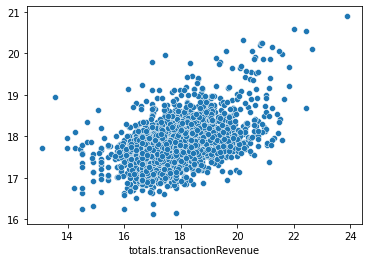

In [140]:
sns.scatterplot(y_test, pred)

- 어느정도는 예측을 하고있다